## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,888,771 (91.13 MB)

 Trainable params: 301,059 (1.15 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 501 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 313 images belonging to 3 classes.


In [20]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=training_set.samples,
  validation_steps=test_set.samples
)

Epoch 1/50


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 16/501 ━━━━━━━━━━━━━━━━━━━━ 13:32 2s/step - accuracy: 0.3354 - loss: 7.7579

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


501/501 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.3373 - loss: 6.6633 - val_accuracy: 0.3163 - val_loss: 4.4166
Epoch 2/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 46s 78ms/step - accuracy: 0.4166 - loss: 2.7821 - val_accuracy: 0.3706 - val_loss: 1.9800
Epoch 3/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 47s 78ms/step - accuracy: 0.5962 - loss: 1.1519 - val_accuracy: 0.6326 - val_loss: 0.9241
Epoch 4/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 50s 84ms/step - accuracy: 0.5760 - loss: 0.9113 - val_accuracy: 0.5495 - val_loss: 1.4328
Epoch 5/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.7263 - loss: 0.6217 - val_accuracy: 0.5911 - val_loss: 1.1580
Epoch 6/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 48s 79ms/step - accuracy: 0.7359 - loss: 0.6211 - val_accuracy: 0.7157 - val_loss: 0.8065
Epoch 7/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 50s 84ms/step - accuracy: 0.7383 - loss: 0.6127 - val_accuracy: 0.7636 - val_loss: 0.9323
Epoch 8/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 48s 79ms/step - accuracy: 0.7269 - loss: 0.5874 - val_accurac

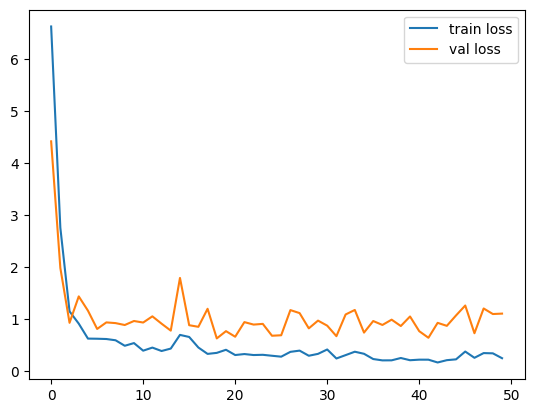

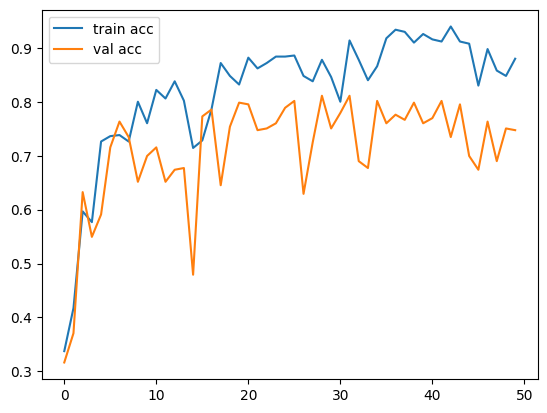

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [23]:

y_pred = model.predict(test_set)


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


In [24]:
y_pred

array([[9.79911983e-01, 3.49808438e-03, 1.65898520e-02],
       [9.31385279e-01, 2.97087859e-02, 3.89059409e-02],
       [2.26242747e-02, 9.77375627e-01, 1.56698263e-08],
       [9.79800582e-01, 1.33386869e-02, 6.86064269e-03],
       [9.98947084e-01, 1.00126420e-03, 5.16641048e-05],
       [5.76100111e-01, 3.40180136e-02, 3.89881939e-01],
       [1.65297449e-01, 1.88763347e-03, 8.32814991e-01],
       [1.17009550e-01, 8.82989407e-01, 1.05653476e-06],
       [6.53188229e-01, 3.46657604e-01, 1.54156820e-04],
       [9.99861360e-01, 8.67177223e-05, 5.18423913e-05],
       [2.21425854e-02, 1.76082231e-05, 9.77839828e-01],
       [7.02410042e-02, 9.29715872e-01, 4.30743457e-05],
       [4.81922060e-01, 7.11936096e-04, 5.17365992e-01],
       [9.79138076e-01, 2.08615623e-02, 3.69174217e-07],
       [9.99992490e-01, 7.55441260e-06, 1.61927216e-09],
       [9.11171138e-01, 8.26147199e-02, 6.21420657e-03],
       [9.97595251e-01, 5.31026511e-04, 1.87379576e-03],
       [9.96143699e-01, 3.82606

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0,
       2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model = load_model(r'C:\Users\LENOVO\OneDrive\Desktop\Deep-Learning-Car-Brand\model_resnet50.h5')


In [29]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [31]:
img=image.load_img('Datasets/Test/mercedes/4.jpg',target_size=(224,224))



In [32]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[9.8760509e-01, 1.1538873e-12, 1.2394952e-02]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [39]:
a==0

array([ True])